Accuracy: 0.9386

Classification Report:

              precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



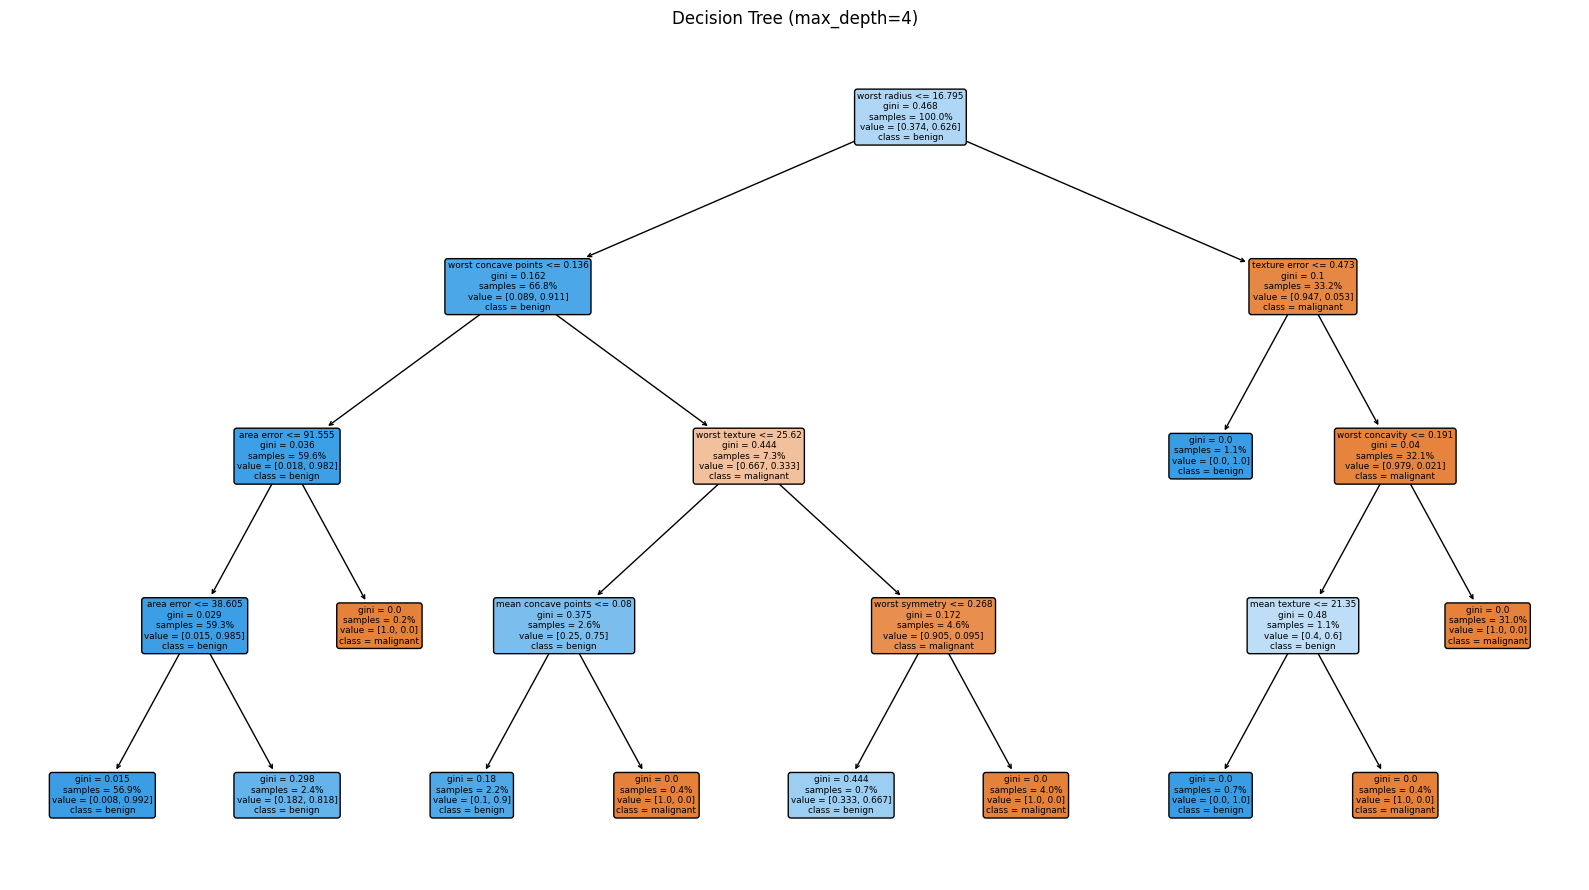

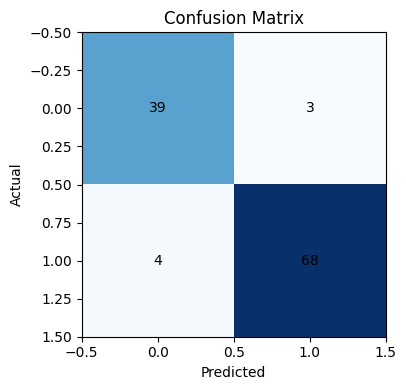

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot the decision tree
plt.figure(figsize=(16, 9))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    impurity=True,
    proportion=True,
    rounded=True
)
plt.title("Decision Tree (max_depth=4)")
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="black")
plt.tight_layout()
plt.show()
